# Lesson 7.03 Hierarchical Clustering

## Recap: K-Means
Here’s a brief overview of how K-means works:

1. Decide the number of clusters (k)
2. Select k random points from the data as centroids
3. Assign all the points to the nearest cluster centroid
4. Calculate the centroid of newly formed clusters
5. Repeat steps 3 and 4

It is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

## Why Hierarchical Clustering?

Based on the above, there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges effectively. It takes away the problem of having to pre-define the number of clusters.

## What is Hierarchical Clustering?
- We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

- Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

- We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.


## Setting up for hierarchical clustering analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

from sklearn.metrics import silhouette_score

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)

rcParams['figure.figsize'] = 10, 3
sb.set_style('whitegrid')

### Load Data

In [4]:
df = pd.read_csv('data/iris.data.csv', header=None, sep=',')
df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

# Set X
X = df[['Sepal Length','Sepal Width','Petal Length','Petal Width']]

# Set y by converting the class labels to numeric labels e.g. 0,1,2

# Set y
y = df['Species']

# display first 5 rows of data frame
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Using `scipy` to generate dendrograms

In [5]:
# call linkage function on X-values
# linkage function executes hierarchical clustering on specified data
# ward takes the sum of squares of dist btw each pair of points divided by total sum of similarities btw 2 clusters
# Z is the clustering result that has been generated from scipy's hierarchical clustering library

# Here, "X" represents the matrix of data that we are clustering, and "ward" tells our
# algorithm which method to use to calculate distance between our newly formed
# clusters - in this case Ward's Method which seeks to minimize the variance when
# forming clusters. When calculating distance, the default is Euclidean distance
Z = linkage(X, 'ward')

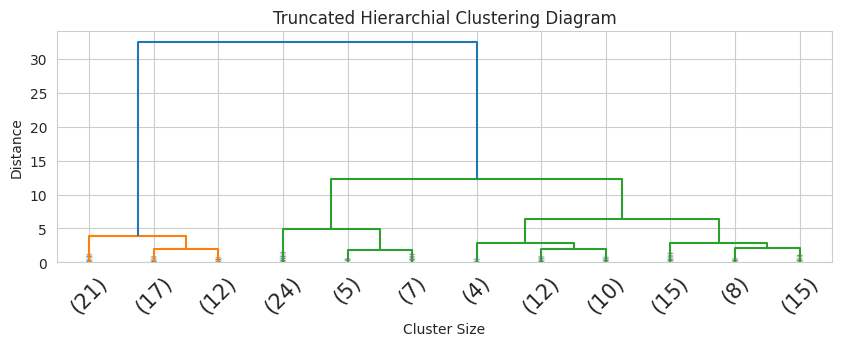

In [6]:
# create dendogram using clustering results, Z from above
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# create horizontal lines on the plot
plt.axhline(y=500)
plt.axhline(y=150)

# display dendogram
plt.show()

### Generating hierarchical clusters

In [7]:
# Set k = 3, since Y variable consists of only 3 flower species classes 
k = 3

# create hierarchical clustering object
Hclustering = AgglomerativeClustering(n_clusters=k)
Hclustering.fit(X)

# The labels_ property returns an array of integers where the values correspond to the distinct categories
labels = Hclustering.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualise Clusters

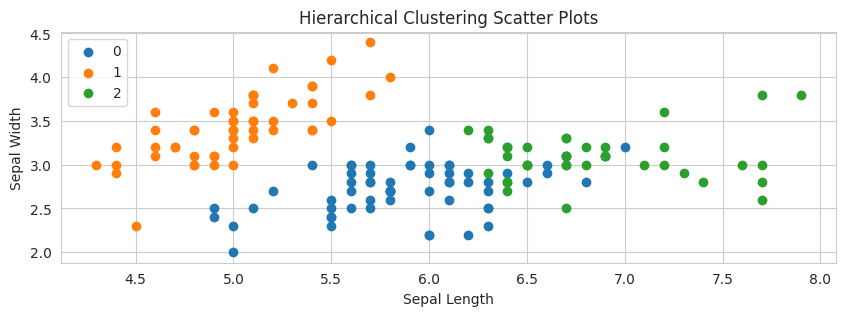

In [8]:
# We can use a shorthand notation to display all the samples belonging to a category as a specific color.

# Create a list to store the scatter plots
scatter_plots = []

# Iterate over the cluster labels and create a scatter plot for each label
for label in np.unique(labels):
    # Get the data points for the current label
    data = X[labels == label]

    # Create a scatter plot for the data points
    scatter_plot = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], label=label)

    # Add the scatter plot to the list
    scatter_plots.append(scatter_plot)

# Set the title and labels for the plot
plt.title('Hierarchical Clustering Scatter Plots')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

### Evaluate Clustering Quality

In [9]:
# generate silhouette score
print('Silhouette Score: ' + str(round(silhouette_score(X, labels),2)))

Silhouette Score: 0.55
